# Aula 1
---

## Importando dataset

In [1]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
tmdb = pd.read_csv('data/tmdb_5000_movies.csv')
notas = pd.read_csv('data/ratings.csv')

In [3]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Visualizando dados do TMDB

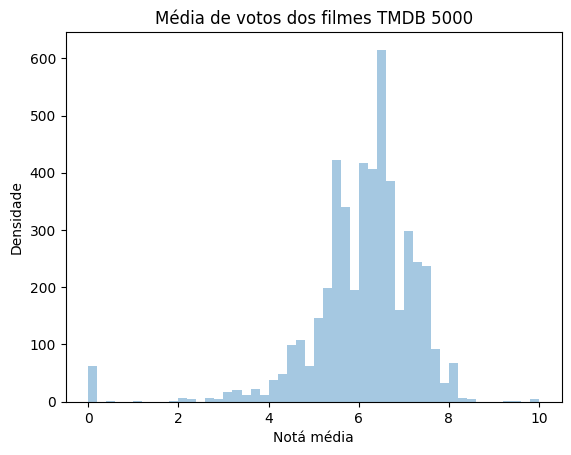

In [5]:
ax = sns.distplot(tmdb.vote_average, kde = False)
ax.set(xlabel='Notá média', ylabel='Densidade', title='Média de votos dos filmes TMDB 5000');

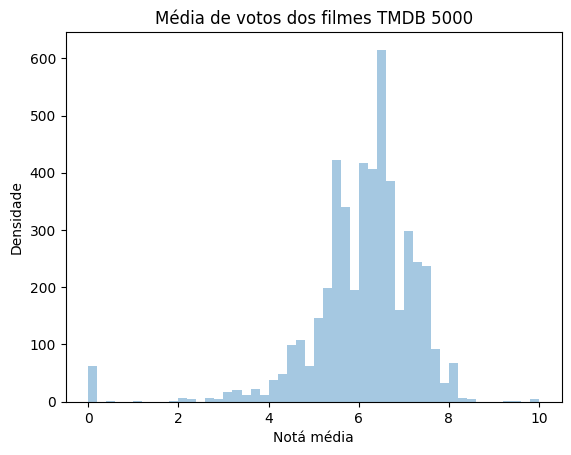

In [6]:
ax = sns.distplot(tmdb.vote_average, kde=False, norm_hist=False)
ax.set(xlabel='Notá média', ylabel='Densidade', title='Média de votos dos filmes TMDB 5000');

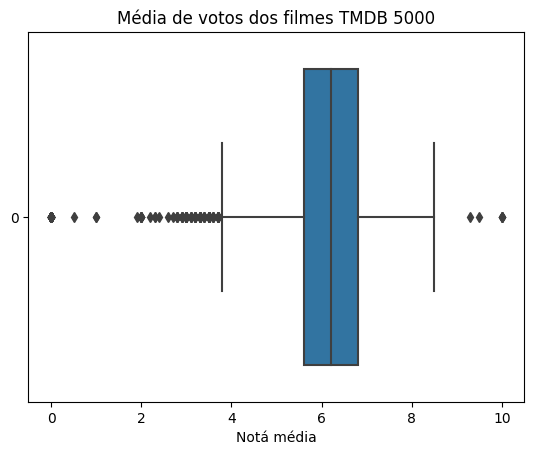

In [7]:
ax = sns.boxplot(tmdb.vote_average, orient='h')
ax.set(xlabel='Notá média', title='Média de votos dos filmes TMDB 5000');

## Tratando dados do TMDB

In [8]:
tmdb = tmdb.query('vote_count >= 10')

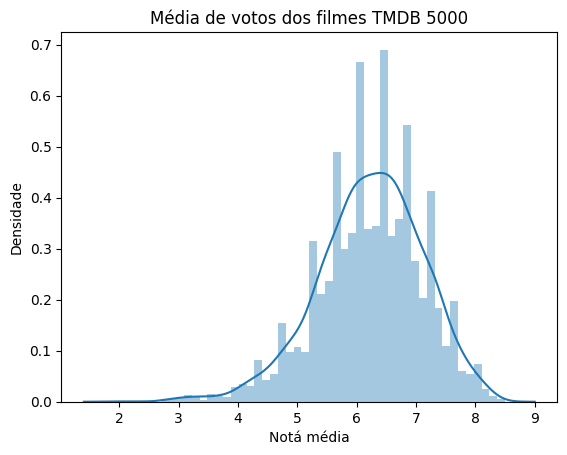

In [9]:
ax = sns.distplot(tmdb.vote_average, kde = True)
ax.set(xlabel='Notá média', ylabel='Densidade', title='Média de votos dos filmes TMDB 5000');

<AxesSubplot:>

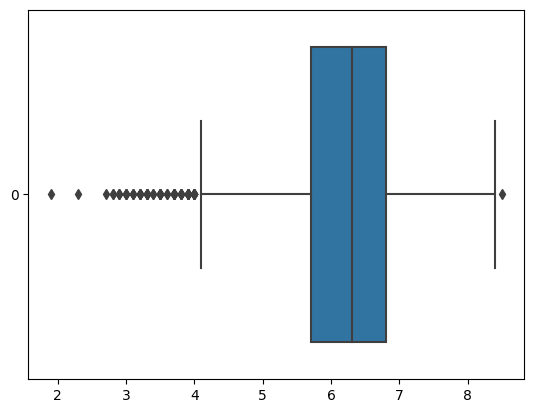

In [10]:
sns.boxplot(tmdb.vote_average, orient = 'h')

## Visualizando dados do MovieLens

In [11]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
notas_por_filme = notas.groupby('movieId')['rating'].mean()

In [13]:
quantidade_de_votos = notas.groupby('movieId').count()

In [14]:
notas_por_filme = notas_por_filme.loc[quantidade_de_votos.query('rating >= 10').index]

<AxesSubplot:xlabel='rating', ylabel='Density'>

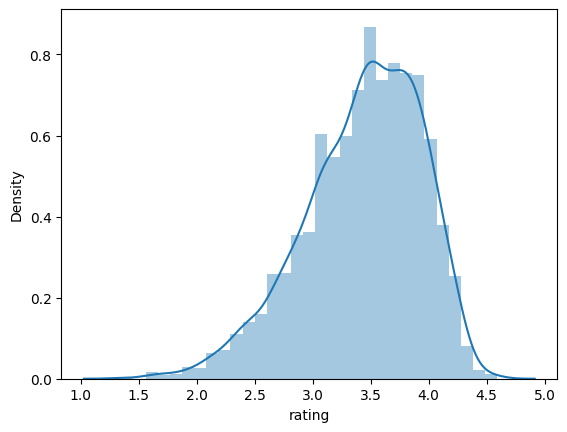

In [15]:
sns.distplot(notas_por_filme)

<AxesSubplot:>

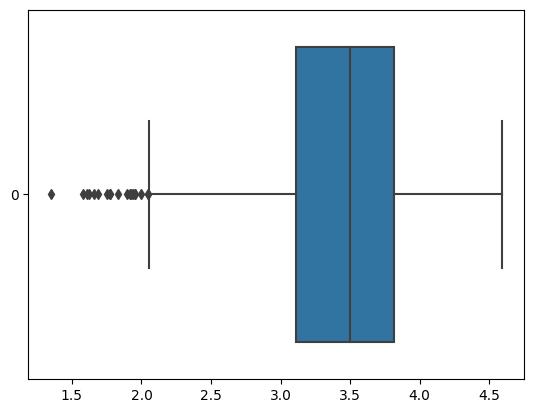

In [16]:
sns.boxplot(notas_por_filme.values, orient = 'h')

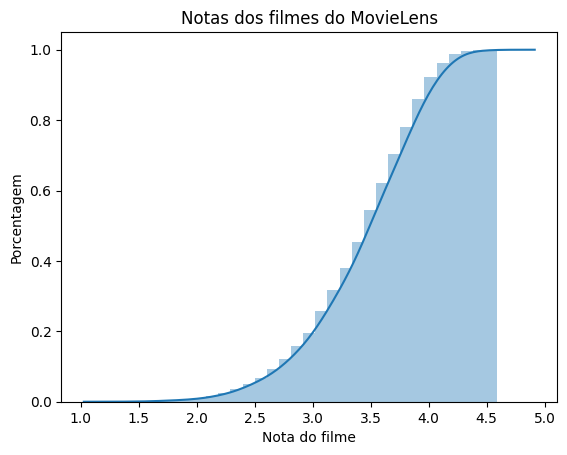

In [17]:
ax = sns.distplot(notas_por_filme, kde_kws={'cumulative' : True}, hist_kws={'cumulative' : True})

ax.set(xlabel = 'Nota do filme', ylabel = 'Porcentagem', title='Notas dos filmes do MovieLens');

# Aula 2
---

<AxesSubplot:xlabel='vote_count', ylabel='Density'>

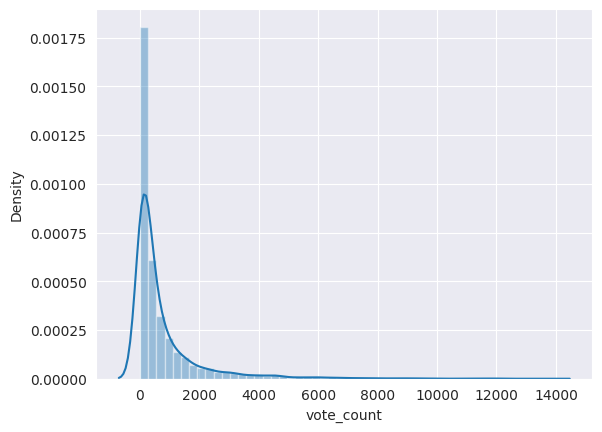

In [18]:
sns.set_style('darkgrid')

sns.distplot(tmdb.vote_count)

<AxesSubplot:xlabel='budget', ylabel='Density'>

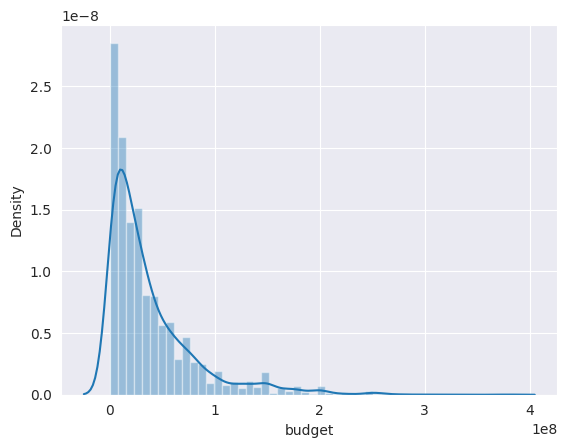

In [19]:
sns.distplot(tmdb.query('budget > 0').budget)

<AxesSubplot:xlabel='popularity', ylabel='Density'>

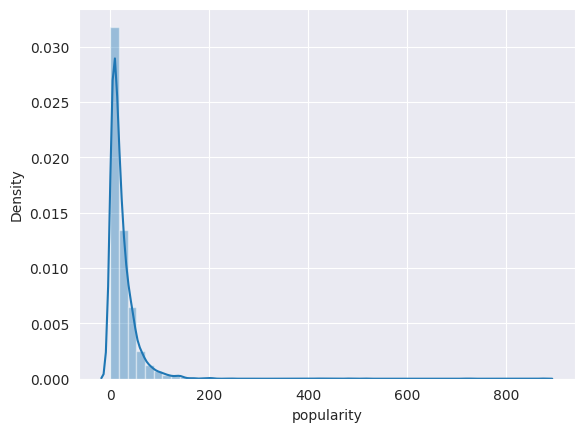

In [20]:
sns.distplot(tmdb.popularity)

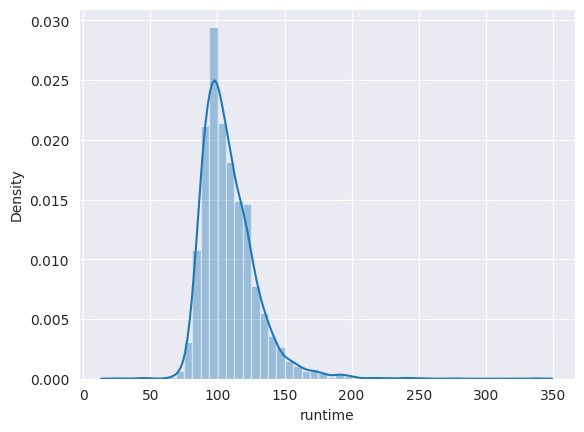

In [21]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna(), norm_hist=False)

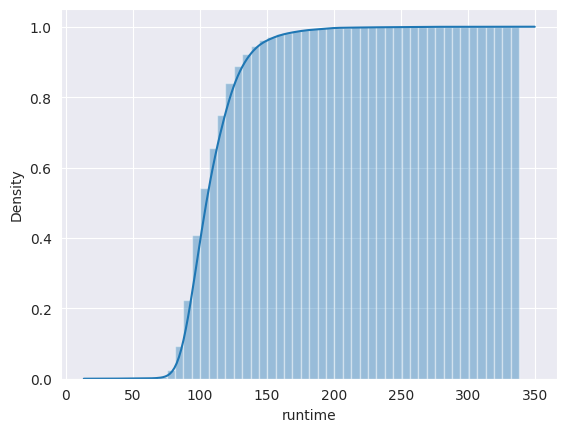

In [22]:
ax = sns.distplot(tmdb.query('runtime > 0').runtime.dropna(),
                  norm_hist=False, hist_kws={'cumulative' : True},
                  kde_kws={'cumulative' : True})

In [23]:
tmdb.query('runtime > 0').runtime.dropna().quantile(0.5)

105.0

# Aula 3
---

In [24]:
notas_por_filme.mean()

3.4320503405352594

In [25]:
notas_por_filme[0:5].mean()

3.5259741603585653

In [26]:
import numpy as np

np.random.seed(75243)

tmp = notas_por_filme.sample(frac=1)

medias = [tmp[0:i].mean() for i in range(1, len(tmp), 1)]


In [27]:
import matplotlib.pyplot as plt

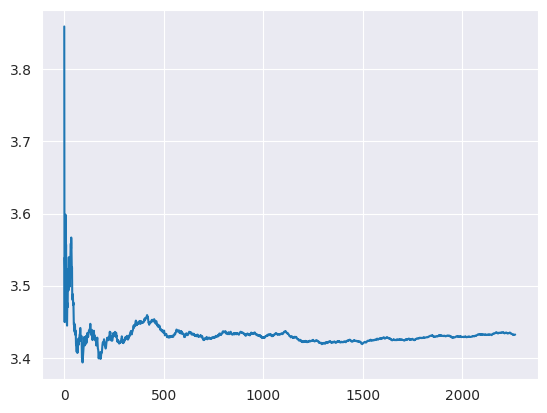

In [28]:
plt.plot(medias)

In [29]:
from statsmodels.stats.weightstats import zconfint

In [30]:
zconfint(notas_por_filme)

(3.4112459477469557, 3.452854733323563)

In [31]:
sum(zconfint(notas_por_filme)) / 2

3.4320503405352594

In [32]:
from statsmodels.stats.weightstats import DescrStatsW

In [33]:
descr = DescrStatsW(notas_por_filme)
descr.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

## Aula 4
---

In [34]:
filmes = pd.read_csv('data/movies.csv')

In [35]:
filmes.query('movieId == 1')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


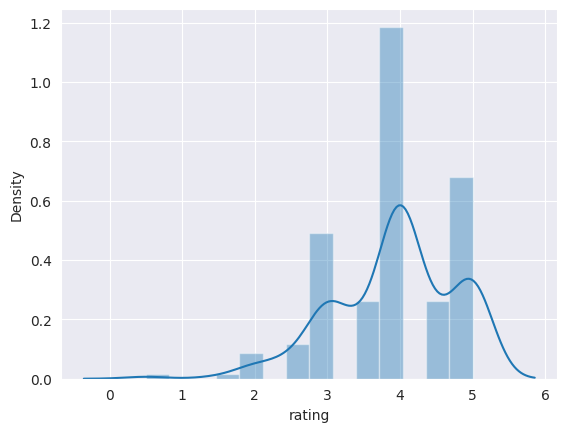

In [36]:
nota1 = notas.query('movieId == 1')
sns.distplot(nota1.rating);

<AxesSubplot:xlabel='rating'>

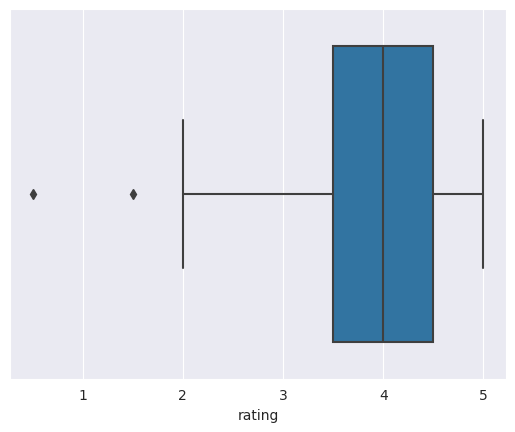

In [37]:
sns.boxplot(x = nota1.rating)

In [38]:
nota1.rating.mean()

3.9209302325581397

In [39]:
nota1.rating.count()

215

In [40]:
zconfint(nota1.rating)

(3.8093359183563402, 4.032524546759939)

In [41]:
from statsmodels.stats.weightstats import ztest

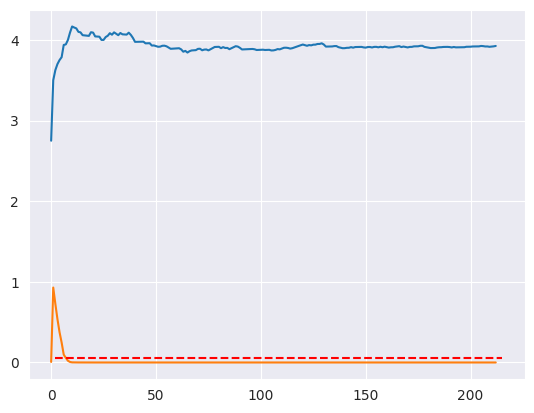

In [42]:
tmp = nota1.sample(frac=1).rating

np.random.seed(75241)

def calcula_teste(i):
    media = tmp[0:i].mean()
    stat, p = ztest(tmp[0:i], value = 3.43205)
    
    return (media, p)

medias = np.array([calcula_teste(i) for i in range(2, len(tmp), 1)])

plt.plot(medias)
plt.hlines(y=0.05, xmin=2, xmax=len(tmp), colors='red', linestyles='--')

# Aula 5
---

In [45]:
print(ztest(nota1.rating, notas.rating))

(5.894327101501841, 3.762112778881965e-09)


In [44]:
zconfint(nota1.rating, notas.rating)

(0.2799245129192442, 0.5588219849631111)

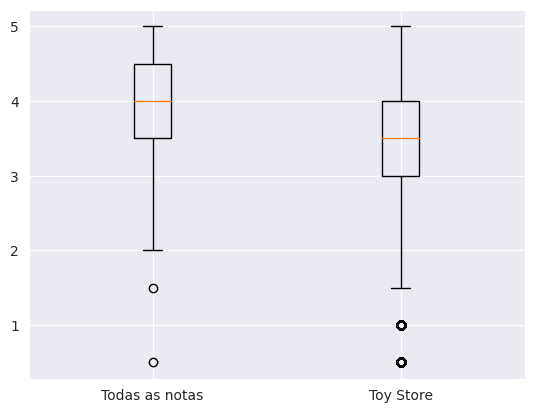

In [51]:
plt.boxplot([nota1.rating, notas.rating], labels=['Todas as notas', 'Toy Store']);